In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LJhelpers import *

In [5]:
# Set up the initial configuration

# Four lical minima of LJ7:
# f1 = -16.50538417 Pentagonal bipyramid 
# f2 = -15.93504306 Capped octahedron 
# f3 = -15.59321094 Tricapped tetrahedron 
# f4 = -15.53306005 Bicapped trigonal bipyramid

# Options: model = 0,1,2,3, or 4.
# Model 0 corresponds to a random initialization.
# Models 1--4 set the system up close to the corresponding local minima
# listed above.


In [104]:
Na = 7 #the number of atoms
rstar = 2**(1/6) # argument of the minimum of the Lennard-Jones pair potential V(r) = r^(-12) - r^(-6)
tol = 1e-6 # stop iterations when ||grad f|| < tol
iter_max = 1000 # the maximal number of iterations
draw_flag = 1 # if draw_flag = 1, draw configuration at every iteration
# parameters for backtracking line search
c = 0.3;
rho = 0.9;


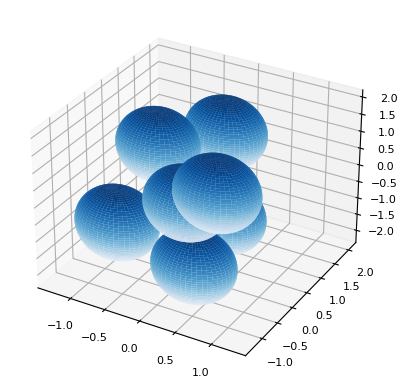

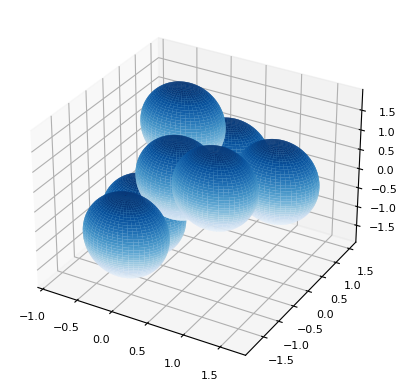

LJpot =  9075.068925031132


In [105]:
model = 0
if( model > 0):
    Na = 7
xyz = initial_configuration(model,Na,rstar)
drawconf(xyz,0.5*rstar);

x = remove_rotations_translations(xyz)
drawconf(LJvector2array(x),0.5*rstar)
print("LJpot = ",LJpot(x))
# print(LJhess(x))

Initially, f =  9075.068925031132 , ||grad f|| =  208718.07521669866
iter 1: dir = SD, f = 611.031342, ||grad f|| = 1.002203e+04, step length = 1.351e-01
iter 2: dir = FRCG, f = 164.113321, ||grad f|| = 1.819686e+03, step length = 1.351e-01
iter 3: dir = FRCG, f = 31.698337, ||grad f|| = 5.746985e+02, step length = 2.288e-01
iter 4: dir = FRCG, f = 0.847151, ||grad f|| = 1.242930e+02, step length = 1.668e-01
iter 5: dir = FRCG, f = -7.747146, ||grad f|| = 3.526731e+01, step length = 2.288e-01
iter 6: dir = FRCG, f = -9.398818, ||grad f|| = 5.910144e+00, step length = 1.501e-01
iter 7: dir = FRCG, f = -9.568452, ||grad f|| = 3.010537e+00, step length = 7.977e-02
iter 8: dir = FRCG, f = -9.636032, ||grad f|| = 4.215383e+00, step length = 7.179e-02
iter 9: dir = FRCG, f = -9.752895, ||grad f|| = 4.484351e+00, step length = 8.863e-02
iter 10: dir = FRCG, f = -9.865248, ||grad f|| = 5.392952e+00, step length = 7.179e-02
iter 11: dir = FRCG, f = -9.984906, ||grad f|| = 4.429407e+00, step len

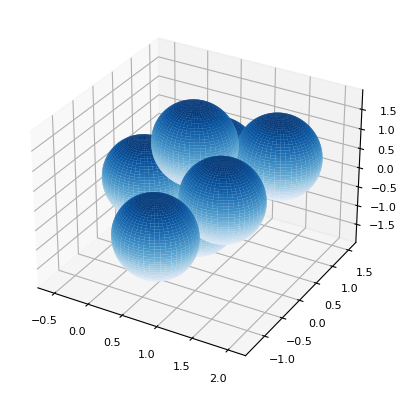

iter 101: dir = FRCG, f = -15.533060, ||grad f|| = 9.705956e-05, step length = 1.330e-02
iter 102: dir = FRCG, f = -15.533060, ||grad f|| = 5.066742e-05, step length = 9.698e-03
iter 103: dir = FRCG, f = -15.533060, ||grad f|| = 5.773649e-05, step length = 2.028e-02
iter 104: dir = FRCG, f = -15.533060, ||grad f|| = 3.623581e-05, step length = 1.825e-02
iter 105: dir = FRCG, f = -15.533060, ||grad f|| = 1.275230e-05, step length = 8.728e-03
iter 106: dir = FRCG, f = -15.533060, ||grad f|| = 1.217577e-05, step length = 1.478e-02
iter 107: dir = FRCG, f = -15.533060, ||grad f|| = 7.189848e-06, step length = 1.825e-02
iter 108: dir = FRCG, f = -15.533060, ||grad f|| = 5.554225e-06, step length = 1.197e-02
iter 109: dir = FRCG, f = -15.533060, ||grad f|| = 3.821542e-06, step length = 1.825e-02
iter 110: dir = FRCG, f = -15.533060, ||grad f|| = 3.467644e-06, step length = 1.478e-02
iter 111: dir = FRCG, f = -15.533060, ||grad f|| = 1.571454e-06, step length = 1.478e-02
iter 112: dir = FRCG,

In [106]:
# start minimization
# choose algorithm
# direction = 0: steepest descent
# direction = 1: Newton
# direction = 2: BFGS
# direction = 3: FRCG
# direction = 4: PRCG
direction = 3

f = LJpot(x)
g = LJgrad(x)
norm_g = np.linalg.norm(g)
print("Initially, f = ",f,", ||grad f|| = ",norm_g)

fvals = np.zeros(iter_max)
fvals[0] = f
ngvals = np.zeros(iter_max)
ngvals[0] = norm_g

iter = 1

# new varialbes
d = len(x)
x_arr = []
g_arr = []
x_arr.append(x)
g_arr.append(g)
B = np.eye(d)
found_spd = False

while (norm_g > tol and iter < iter_max): 
    #choose search direction
    if( direction == 0): # steepest descent
        p = -g
        dir = "SD"
    
    elif( direction == 1): # Newton
        H = LJhess(x)
#         print(np.linalg.eigvals(H))
        spd = np.all(np.linalg.eigvals(H) > 0)
        if( spd ): # H is SPD, use Newton's direction
            p = np.linalg.solve(H,-g) 
            dir = "Newton"
        else: # use the steepest descent direction
            p = -g
            dir = "SD";
    
    elif (direction == 2): # BFGS
        # initial Hessian
        if found_spd==False:
            B = np.eye(d)
            p = np.linalg.solve(B,-g) 
            found_spd = True
            dir = "BFGS (initialize)"
            
        # update Hessian
        else:
            # reset B matrix
            if iter%20 == 0:
                B = np.eye(d)
            
            y = g_arr[-1] - g_arr[-2]
            y = np.array([y])
            s = np.array(x_arr[-1] - x_arr[-2])
            y = np.reshape(y,(d,1))
            s = np.reshape(s,(d,1))
            
            r = 1/(y.T@s)
            rterm = r*(y@y.T)
            l = 1/(s.T@B@s)
            lterm = l*(B@s@s.T@B)
            
            B = B - lterm + rterm
            p = np.linalg.solve(B,-g) 
            dir = "BFGS"
    
    elif (direction == 3): # FRCG
        if (len(x_arr) == 1): # steepest descent
            p = -g
            dir = "SD"
        
        else:
            gkplus1 = g_arr[-1]
            gk = g_arr[-2]
            numerator = gkplus1.T@gkplus1
            denominator = gk.T@gk
            beta = numerator / denominator
            p = beta*p - gkplus1
            dir = "FRCG"
            
    elif (direction == 4): # PRCG
        if (len(x_arr) == 1): # steepest descent
            p = -g
            dir = "SD"
        
        else:
            gkplus1 = g_arr[-1]
            gk = g_arr[-2]
            numerator = gkplus1.T@(gkplus1-gk)
            denominator = gk.T@gk
            beta = max(numerator / denominator, 0)
            p = beta*p - gkplus1
            dir = "PRCG"
    
    else:
        print("direction is out of range")
        break
        
    # normalize the search direction if its length greater than 1
    norm_p = np.linalg.norm(p)
    if( norm_p > 1):
        p = p/norm_p
        
    # do backtracking line search along the direction p
    a = 1 # initial step length
    f_temp = LJpot(x + a*p)
    cpg = c*np.dot(p,g)
#     print("cpg = ",cpg,"f = ",f,"f_temp = ",f_temp)

    while( f_temp > f + a*cpg ): # check Wolfe's condition 1
        a = a*rho
        if( a < 1e-14 ):
            print("line search failed\n");
            iter = iter_max-1
            break
        f_temp = LJpot(x + a*p)        
#         print("f_temp = ",f_temp)

    x = x + a*p
    f = LJpot(x)
    g = LJgrad(x)
    
    # new added
    x_arr.append(x)
    g_arr.append(g)
    
    norm_g = np.linalg.norm(g)
#     print("iter ",iter,": dir = ",dir,", f = ",f,", ||grad f|| = ",norm_g,", step length = ",a)
    print(f"iter {iter}: dir = {dir}, f = {f:.6f}, ||grad f|| = {norm_g:.6e}, step length = {a:.3e}")
    if( iter%100 == 0 ):
        # restore all coordinates
        xyz = LJvector2array(x)
        drawconf(xyz,0.5*rstar)
    fvals[iter] = f
    ngvals[iter] = norm_g
    iter = iter + 1
print(f"Result: f = {f:.10f}, ||grad f|| = {norm_g:.6e}")
    

In [107]:
iter-1

113

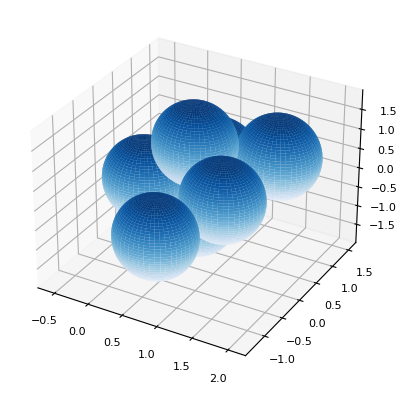

In [108]:
# visualize the final configuration and plot graphs
xyz = LJvector2array(x)    
drawconf(xyz,0.5*rstar)

Text(0.5, 1.0, 'norm grad f')

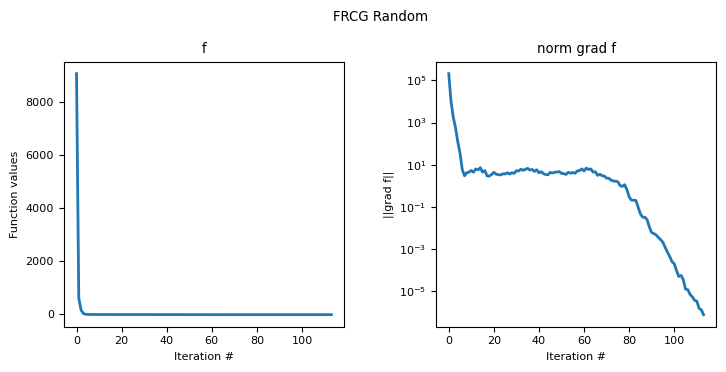

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=5)
plt.rcParams.update({'font.size': 8})
plt.suptitle("FRCG Random")
# ax1.figure(figsize=(8,8))
ax1.plot(np.arange(iter),fvals[0:iter],linewidth = 2)
ax1.set_xlabel("Iteration #")
ax1.set_ylabel("Function values")
ax1.set_title("f")

ax2.plot(np.arange(iter),ngvals[0:iter],linewidth = 2)
ax2.set_xlabel("Iteration #")
ax2.set_ylabel("||grad f||")
ax2.set_yscale("log")
ax2.set_title("norm grad f")

In [25]:
# ax2.rcParams.update({'font.size': 20})
# ax2.figure(figsize=(8,8))
ax2.plot(np.arange(iter),ngvals[0:iter],linewidth = 2)
ax2.set_xlabel("Iteration #")
ax2.set_ylabel("||grad f||")
ax2.set_yscale("log")

In [26]:
plt.show()

NameError: name 'ax2' is not defined

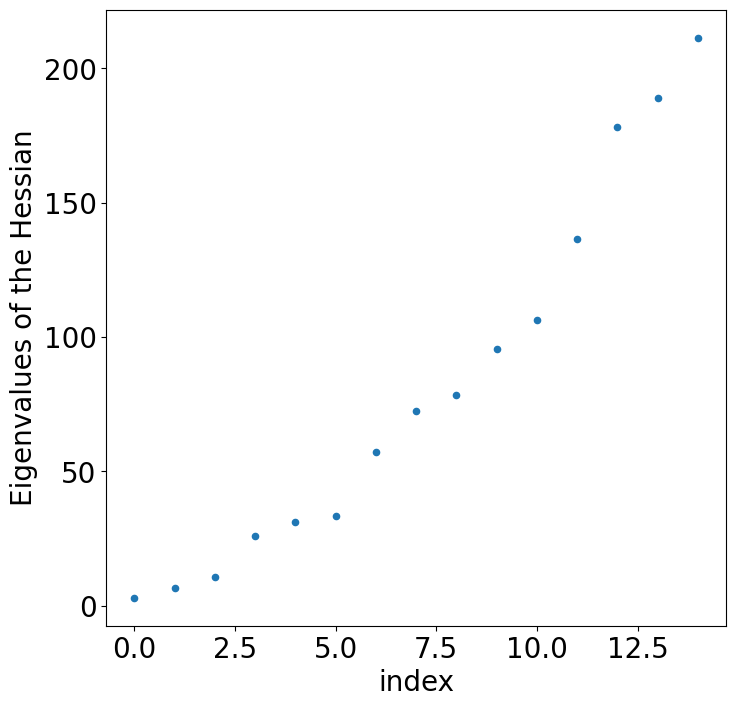

In [17]:
plt.rcParams.update({'font.size': 20})
H = LJhess(x)
evals = np.sort(np.linalg.eigvals(H))
plt.figure(figsize=(8,8))
plt.scatter(np.arange(np.size(x)),evals,s = 20)
plt.xlabel("index")
plt.ylabel("Eigenvalues of the Hessian")
if( evals[0] > 0 ):
    ax2.yscale("log")


'\nResult: f = -16.5053841680, ||grad f|| = 7.810682e-07\n'